In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
excel= 'controle.ods'
df= pd.read_excel(excel)

In [3]:
display(df)

,DATA,ARTIGO,MAQUINA,PESO,METRAGEM
0,2023-10-30,BALLI 16,817,2.4,998.4
1,2023-10-30,BELLES 15,801,6.0,1284.0
2,2023-10-30,MURITI 10,805,18.6,3534.0
3,2023-10-30,BALLI 16,815,2.4,998.4
4,2023-10-30,BELLES 15,814,7.8,1669.2
...,...,...,...,...,...
530,2024-01-12,BELLES 15,850,13.0,2782.0
531,2024-01-12,STILED 18,827,14.4,1929.6
532,2024-01-12,STILED 18,825,13.0,1742.0
533,2024-01-12,BELLES 15,814,9.0,1926.0


In [4]:
df.drop('PESO', axis=1, inplace=True) # axis quer dizer que é uma coluna.
                                      # inplace para modificar o df existente

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DATA      535 non-null    datetime64[ns]
 1   ARTIGO    535 non-null    object        
 2   MAQUINA   535 non-null    int64         
 3   METRAGEM  535 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 16.8+ KB


In [6]:
df['ARTIGO'].describe()

count           535
unique           19
top       BELLES 15
freq            132
Name: ARTIGO, dtype: object

In [7]:
# SALVANDO O DF EM UM CSV
df.to_csv('Arquivo.csv', index=False) # index=False evita a inclusão da coluna de índices no arquivo csv

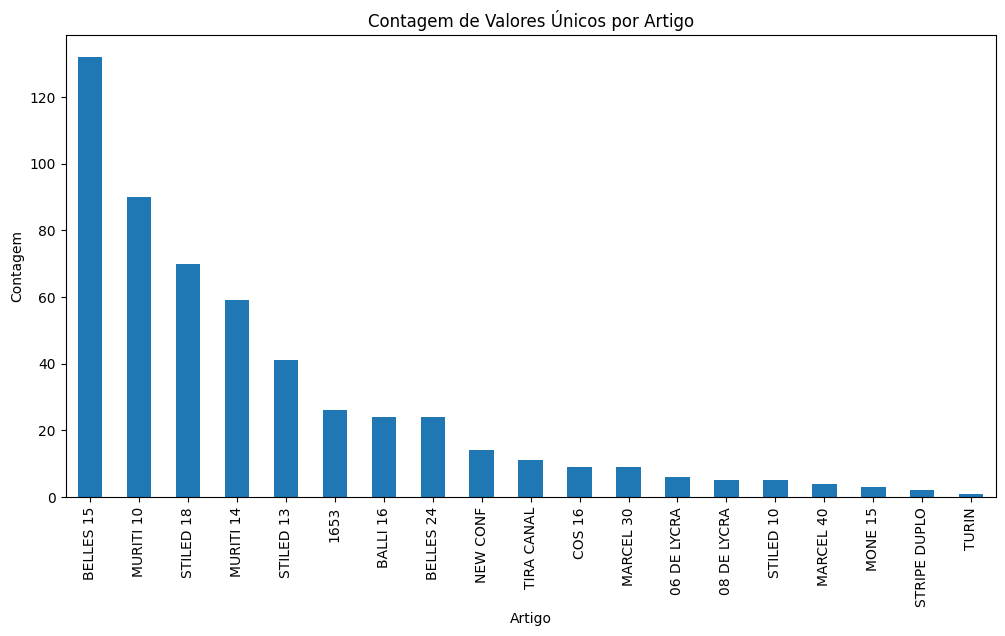

In [8]:
artigo_counts = df['ARTIGO'].value_counts()
plt.figure(figsize=(12,6))
artigo_counts.plot(kind='bar')
plt.title('Contagem de Valores Únicos por Artigo')
plt.xlabel('Artigo')
plt.ylabel('Contagem')
plt.show()

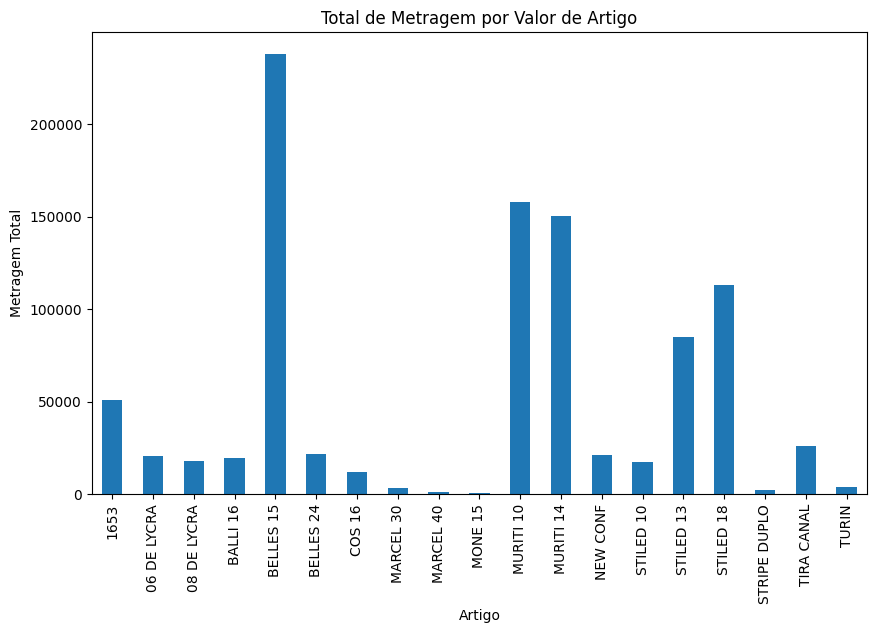

O valor da coluna ARTIGO com a maior metragem total é: BELLES 15


In [9]:
# Calcular a metragem total para cada valor único na coluna 'ARTIGO'
metragem_por_artigo = df.groupby('ARTIGO')['METRAGEM'].sum()

# Encontrar o valor da coluna 'ARTIGO' com a maior metragem
artigo_maior_metragem = metragem_por_artigo.idxmax()

# Plotar um gráfico de barras ou um gráfico de pizza para visualizar as metragens por valor da coluna 'ARTIGO'
plt.figure(figsize=(10, 6))
metragem_por_artigo.plot(kind='bar')
plt.title('Total de Metragem por Valor de Artigo')
plt.xlabel('Artigo')
plt.ylabel('Metragem Total')
plt.show()

# Imprimir o valor da coluna 'ARTIGO' com a maior metragem
print(f'O valor da coluna ARTIGO com a maior metragem total é: {artigo_maior_metragem}')


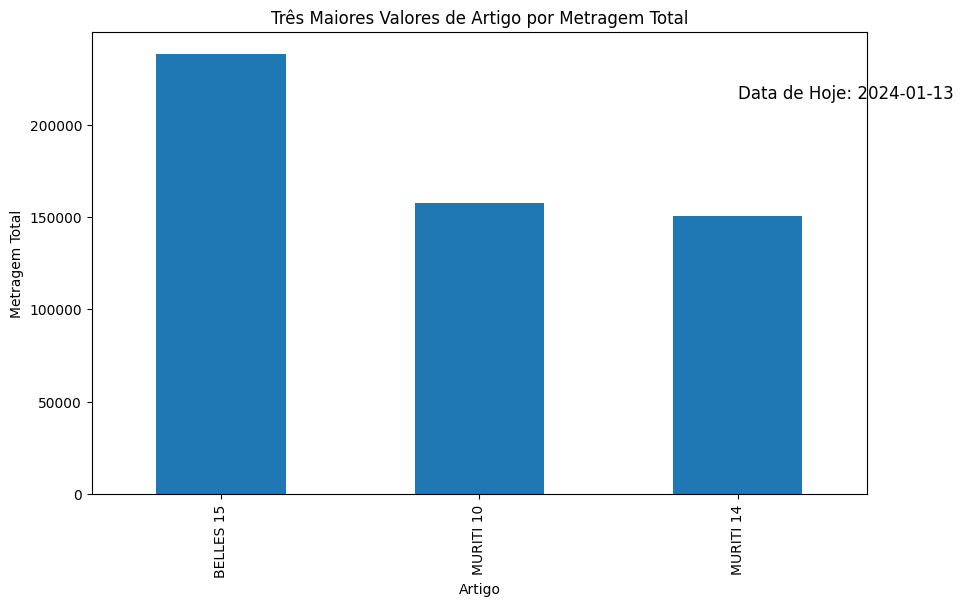

Os três valores da coluna 'ARTIGO' com a maior metragem são:
ARTIGO
BELLES 15    237968.00
MURITI 10    157812.84
MURITI 14    150495.40
Name: METRAGEM, dtype: float64


In [10]:
# Calcular a metragem total para cada valor único na coluna 'ARTIGO'
metragem_por_artigo = df.groupby('ARTIGO')['METRAGEM'].sum()

# Selecionar os três valores da coluna 'ARTIGO' com a maior metragem
top_artigos = metragem_por_artigo.nlargest(3)

# Plotar um gráfico de barras para os três valores da coluna 'ARTIGO' com a maior metragem
plt.figure(figsize=(10, 6))
top_artigos.plot(kind='bar')
plt.title('Três Maiores Valores de Artigo por Metragem Total')
plt.xlabel('Artigo')
plt.ylabel('Metragem Total')

# Adicionar a data de hoje no gráfico
data_hoje = datetime.now().strftime('%Y-%m-%d')
plt.text(2, max(top_artigos) * 0.9, f"Data de Hoje: {data_hoje}", fontsize=12, ha='left')

plt.show()

# Imprimir os três valores da coluna 'ARTIGO' com a maior metragem
print("Os três valores da coluna 'ARTIGO' com a maior metragem são:")
print(top_artigos)

C:\Users\dulor\AppData\Local\Temp\ipykernel_12044\841335992.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='MAQUINA', y='METRAGEM', data=df_belles15, ci=None, palette="viridis")
C:\Users\dulor\AppData\Local\Temp\ipykernel_12044\841335992.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MAQUINA', y='METRAGEM', data=df_belles15, ci=None, palette="viridis")


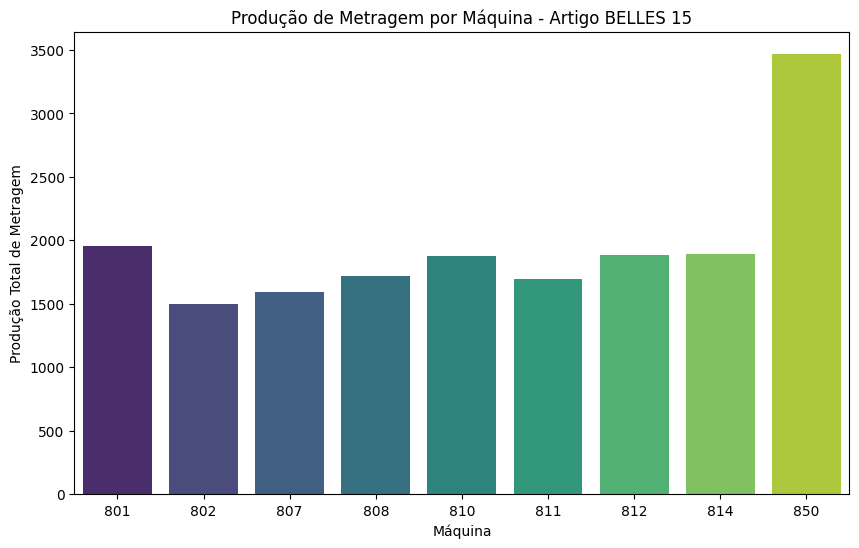

In [20]:
# Filtro para o artigo BELLES 15
df_belles15 = df[df['ARTIGO'] == 'BELLES 15']

# Plotar gráfico de barras para a produção de METRAGEM por máquina para o artigo BELLES 15
plt.figure(figsize=(10, 6))
sns.barplot(x='MAQUINA', y='METRAGEM', data=df_belles15, ci=None, palette="viridis")
plt.title('Produção de Metragem por Máquina - Artigo BELLES 15')
plt.xlabel('Máquina')
plt.ylabel('Produção Total de Metragem')
plt.show()



C:\Users\dulor\AppData\Local\Temp\ipykernel_12044\1234171642.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='MAQUINA', y='METRAGEM', data=df_belles15, ci=None, palette="viridis")
C:\Users\dulor\AppData\Local\Temp\ipykernel_12044\1234171642.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MAQUINA', y='METRAGEM', data=df_belles15, ci=None, palette="viridis")


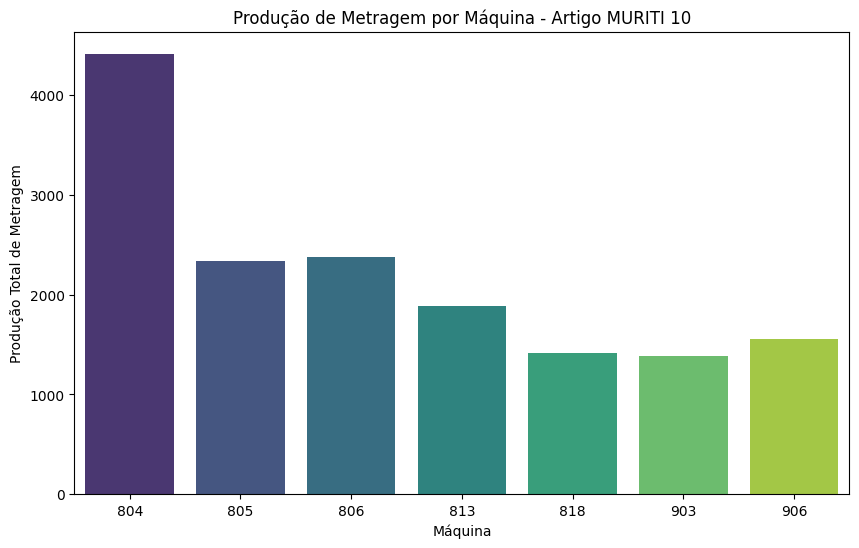

In [22]:
# Filtro para o artigo BELLES 15
df_belles15 = df[df['ARTIGO'] == 'MURITI 10']

# Plotar gráfico de barras para a produção de METRAGEM por máquina para o artigo BELLES 15
plt.figure(figsize=(10, 6))
sns.barplot(x='MAQUINA', y='METRAGEM', data=df_belles15, ci=None, palette="viridis")
plt.title('Produção de Metragem por Máquina - Artigo MURITI 10')
plt.xlabel('Máquina')
plt.ylabel('Produção Total de Metragem')
plt.show()


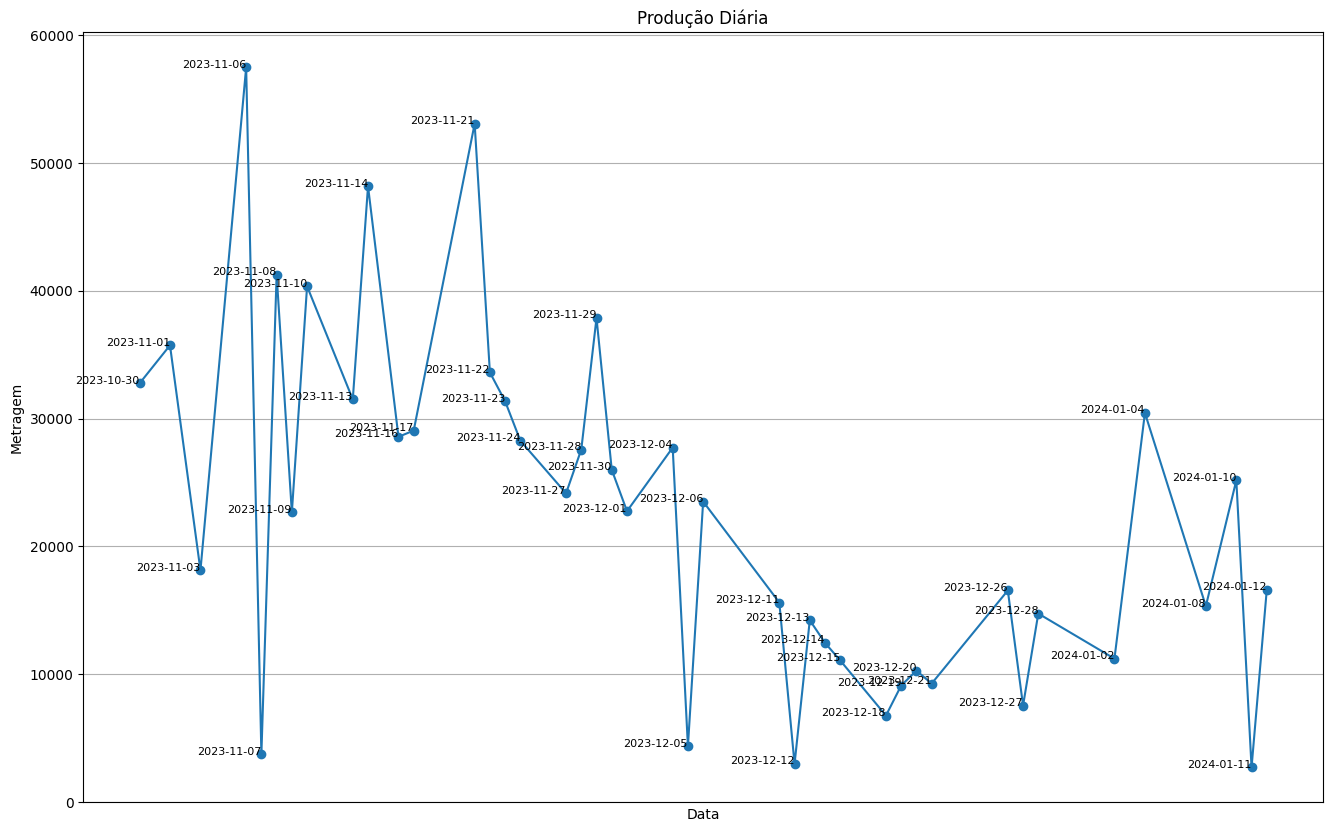

In [12]:
df['DATA'] = pd.to_datetime(df['DATA'])

# Escolha as datas de início e fim desejadas
data_inicio = '2023-10-30'
data_fim = datetime.now().strftime('%Y-%m-%d')

# Filtrar o DataFrame com base nas datas escolhidas
df_filtrado = df[(df['DATA'] >= data_inicio) & (df['DATA'] <= data_fim)]

# Agregar a produção diária para as datas filtradas
producao_diaria = df_filtrado.groupby('DATA')['METRAGEM'].sum().reset_index()

# Plote o gráfico
plt.figure(figsize=(16, 10))
plt.plot(producao_diaria['DATA'], producao_diaria['METRAGEM'], marker='o')

# Adicionar os valores da data nas bolinhas do gráfico
for i, txt in enumerate(producao_diaria['DATA']):
    plt.text(producao_diaria['DATA'].iloc[i], producao_diaria['METRAGEM'].iloc[i],
             txt.strftime('%Y-%m-%d'), fontsize=8, ha='right')

# Ocultar as marcas do eixo x
plt.xticks([])

plt.title('Produção Diária')
plt.xlabel('Data')
plt.ylabel('Metragem')
plt.grid(True)
plt.show()


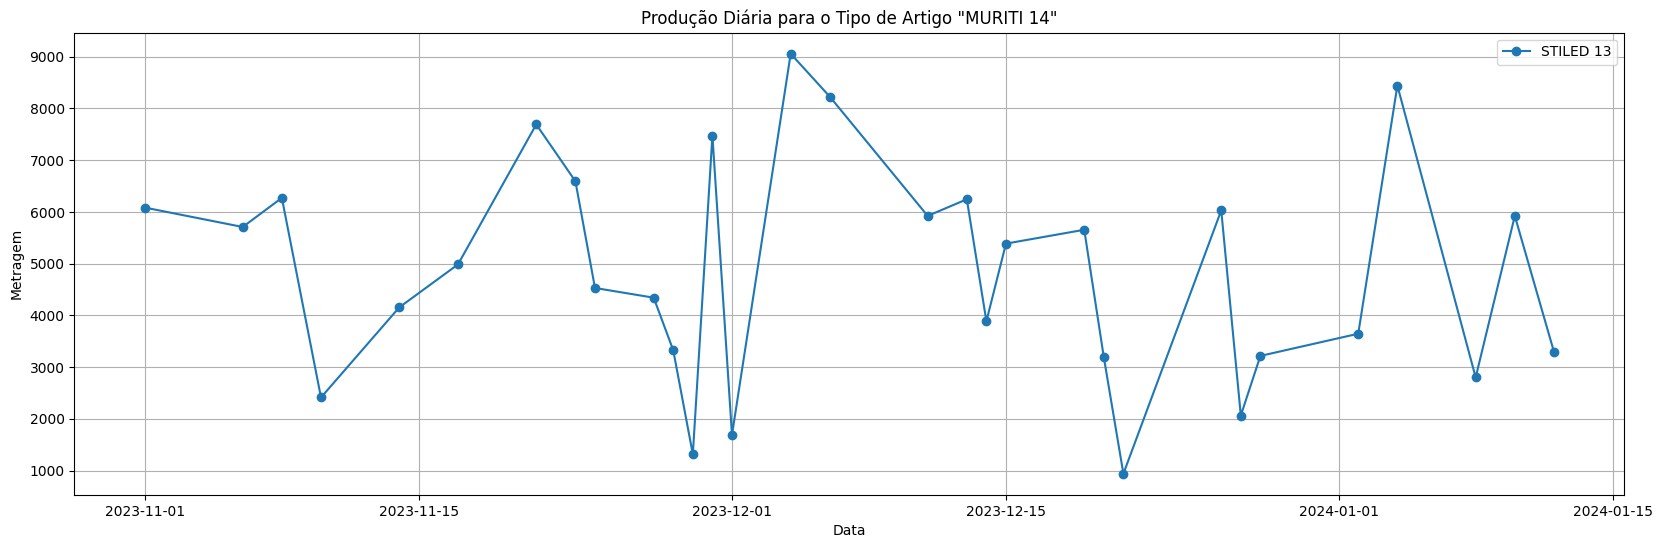

In [13]:
dados = df[df['ARTIGO'] == 'MURITI 14']

# Agrupe os dados por data e some a metragem diária
producao_diaria = dados.groupby('DATA')['METRAGEM'].sum().reset_index()

# Plote o gráfico
plt.figure(figsize=(20, 6))
plt.plot(producao_diaria['DATA'], producao_diaria['METRAGEM'], marker='o', label='STILED 13')
plt.title('Produção Diária para o Tipo de Artigo "MURITI 14"')
plt.xlabel('Data')
plt.ylabel('Metragem')
plt.legend()
plt.grid(True)
plt.show()

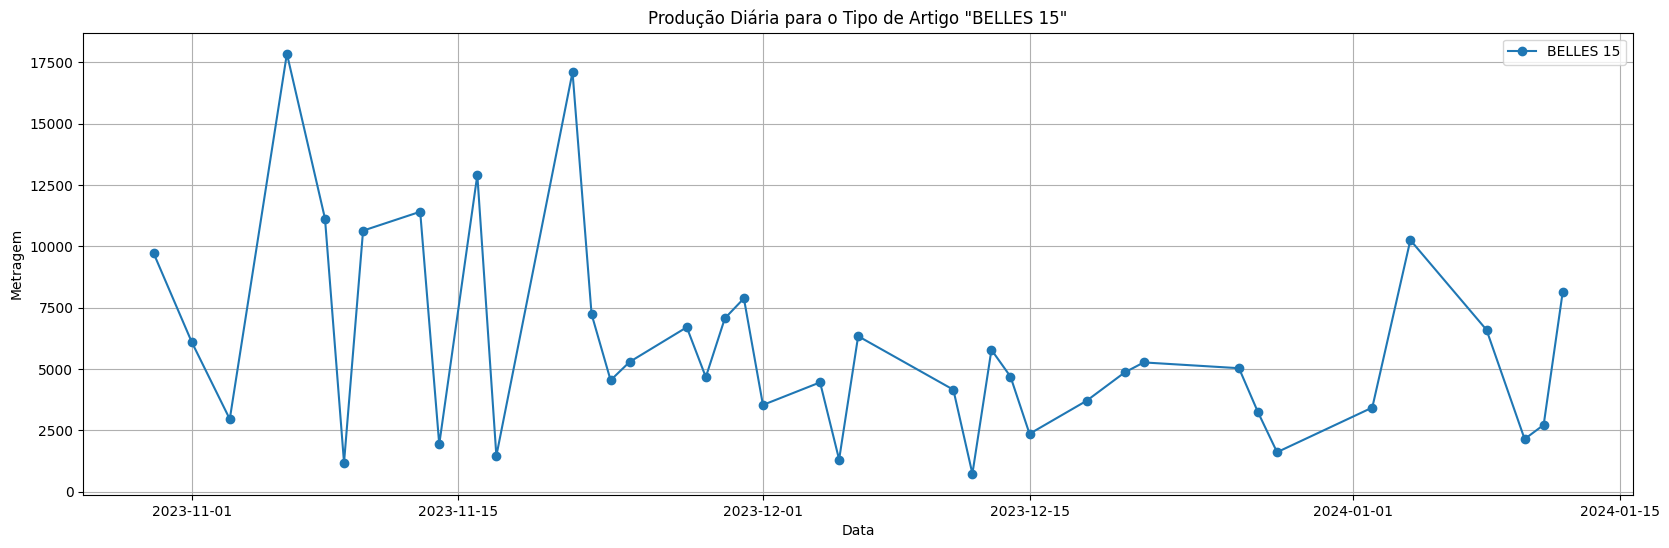

In [14]:
dados = df[df['ARTIGO'] == 'BELLES 15']

# Agrupe os dados por data e some a metragem diária
producao_diaria = dados.groupby('DATA')['METRAGEM'].sum().reset_index()

# Plote o gráfico
plt.figure(figsize=(20, 6))
plt.plot(producao_diaria['DATA'], producao_diaria['METRAGEM'], marker='o', label='BELLES 15')
plt.title('Produção Diária para o Tipo de Artigo "BELLES 15"')
plt.xlabel('Data')
plt.ylabel('Metragem')
plt.legend()
plt.grid(True)
plt.show()